In [77]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 2.1 Exploratory Data Analysis

In [78]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df = pd.read_csv(url)
df = df[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']]
df.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


### Data preparation
* Select only the features from above and fill in the missing values with 0.
* Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
* Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
* Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [79]:
#Missing values to 0
df = df.fillna(0)
df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [80]:
# new column rooms_per_household
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


### Question 1
* What is the most frequent observation (mode) for the column ocean_proximity?

In [81]:
df['ocean_proximity'].value_counts().head(1)

<1H OCEAN    9136
Name: ocean_proximity, dtype: int64

In [82]:
df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

### Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value (median_house_value) is not in your dataframe.

### Setting up the validation framework
* Perform the train/validation/test split with Scikit-Learn

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_full_train, df_test = train_test_split(df, test_size=0.20, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Reser all Index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

### Question 2
* Create the correlation matrix for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

In [85]:
df_train.select_dtypes(float).corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.925005,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,-0.144455,0.119118,-0.124507,-0.002301
longitude,-0.925005,1.000000,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.044328,-0.034814,0.102320,0.011022
housing_median_age,0.002477,-0.099812,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,0.106235,-0.181275,0.129456,0.012167
total_rooms,-0.025914,0.036449,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.128442,0.168926,-0.194185,-0.029452
total_bedrooms,-0.059730,0.063840,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.041154,0.010381,0.078094,-0.034301
population,-0.100272,0.091670,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.033653,-0.076210,0.031592,0.064998
households,-0.063529,0.049762,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,0.056161,-0.085832,0.058004,-0.032522
median_income,-0.076805,-0.016426,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.689202,0.394154,-0.616617,-0.000454
median_house_value,-0.144455,-0.044328,0.106235,0.128442,0.041154,-0.033653,0.056161,0.689202,1.000000,0.179062,-0.256201,-0.030561
rooms_per_household,0.119118,-0.034814,-0.181275,0.168926,0.010381,-0.076210,-0.085832,0.394154,0.179062,1.000000,-0.500589,0.001801


<AxesSubplot:>

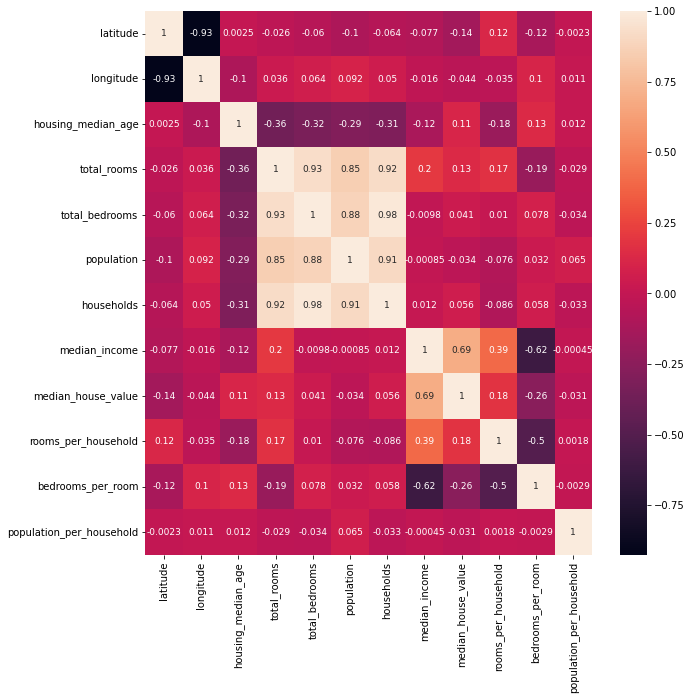

In [86]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_train.corr(),annot=True, annot_kws = {"size":9})

In [87]:
print('total_bedrooms and households')

total_bedrooms and households


### Make median_house_value binary
* We need to turn the median_house_value variable from numeric into binary.
* Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [88]:
df_train['above_average'] = df_train['median_house_value'].apply(lambda x: 1 if x > df_train['median_house_value'].mean() else 0)
df_test['above_average'] = df_test['median_house_value'].apply(lambda x: 1 if x > df_test['median_house_value'].mean() else 0)
df_val['above_average'] = df_val['median_house_value'].apply(lambda x: 1 if x > df_val['median_house_value'].mean() else 0)
 

In [89]:
df_train['above_average']

0        1
1        1
2        0
3        1
4        1
        ..
12379    0
12380    0
12381    1
12382    0
12383    0
Name: above_average, Length: 12384, dtype: int64

### Question 3
* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using round(score, 2)

### Mutual information

In [90]:
from sklearn.metrics import mutual_info_score

In [91]:
categorcal_col = list(df_train.select_dtypes(object))
categorcal_col

['ocean_proximity']

In [92]:
mutual_info = mutual_info_score(df_train.above_average, df_train.ocean_proximity).round(2)
mutual_info

0.1

### Question 4
* Now let's train a logistic regression
* Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
 - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
 - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [93]:
from sklearn.feature_extraction import DictVectorizer


In [94]:
# Select target value (median_house_value)
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values


df_train = df_train.drop(['median_house_value', 'above_average'], axis=1)
df_val= df_val.drop(['median_house_value', 'above_average'], axis=1)
df_test = df_test.drop(['median_house_value', 'above_average'], axis=1)

In [95]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...,...
12379,33.79,-118.29,16.0,1867.0,571.0,951.0,498.0,3.3427,<1H OCEAN,3.748996,0.305838,1.909639
12380,38.04,-121.34,16.0,3295.0,565.0,2279.0,576.0,3.6083,INLAND,5.720486,0.171472,3.956597
12381,32.74,-116.99,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1H OCEAN,5.549834,0.182879,3.242525
12382,33.84,-117.87,16.0,1545.0,354.0,730.0,350.0,4.5112,<1H OCEAN,4.414286,0.229126,2.085714


In [109]:
train_df_ohe = pd.get_dummies(df_train, columns=['ocean_proximity'])
val_df_ohe = pd.get_dummies(df_val, columns=['ocean_proximity'])
test_df_ohe = pd.get_dummies(df_test, columns=['ocean_proximity'])

In [130]:
train_df_ohe

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,3.922460,0.259714,3.754011,1,0,0,0,0
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,7.564516,0.130228,2.789082,0,0,0,0,1
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,3.908012,0.234624,2.540059,0,1,0,0,0
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,5.201093,0.194158,2.059016,1,0,0,0,0
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,7.010127,0.139762,2.516456,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,33.79,-118.29,16.0,1867.0,571.0,951.0,498.0,3.3427,3.748996,0.305838,1.909639,1,0,0,0,0
12380,38.04,-121.34,16.0,3295.0,565.0,2279.0,576.0,3.6083,5.720486,0.171472,3.956597,0,1,0,0,0
12381,32.74,-116.99,18.0,3341.0,611.0,1952.0,602.0,3.9844,5.549834,0.182879,3.242525,1,0,0,0,0
12382,33.84,-117.87,16.0,1545.0,354.0,730.0,350.0,4.5112,4.414286,0.229126,2.085714,1,0,0,0,0


In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [132]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
accuracy = model.score(val_df_ohe, y_val)

### Question 5
* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?

In [128]:
#Select filds of dataframe (features)
filds = df_train.columns.to_list()
filds.remove('longitude')
filds

['latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [ ]:
min_score = 1
fild = None
list_values= []

for c in filds:
    selectFilds = filds.copy()
    selectFilds.remove(c)
    train_dict = df_train[selectFilds].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    
    X_train = dv.fit_transform(train_dict)
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[selectFilds].to_dict(orient='records')
    
    X_val = dv.transform(val_dict)
    
    y_pred =model.predict(X_val)
    
    #score = accuracy_score(y_val, y_pred)
    score = model.score(val_df_ohe, y_val)

    print(c, accuracy-score, score)

    
    if min_score > accuracy-score:
        min_score = accuracy-score
        fild = c

print(f'Fild:{fild}-> {min_score}')


[-0.2374515503875969,
 -0.2369670542635659,
 -0.23672480620155045,
 -0.2364825581395349,
 -0.23624031007751944,
 -0.23502906976744187,
 -0.23478682170542642,
 -0.23284883720930238,
 -0.23236434108527138,
 -0.2275193798449613,
 -0.21976744186046515,
 -0.18754844961240313]